In [1]:
DF_PATH       = "../data/processed/1_preprocessed_df.pkl"
FEATURES_PATH = "../data/processed/features_skills_clusters.pkl"

ROLE_COLS     = ['DevType']
TECH_COLS     = ['LanguageWorkedWith' , 'DatabaseWorkedWith' , 'WebframeWorkedWith', 'MiscTechWorkedWith']

EXPORT_PATH    = "../data/processed/2_cleaned_data.pkl"

In [2]:
# Load packages
import pandas as pd 
import numpy as np
import pickle

import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
# Read Data 
processed_df = pd.read_pickle(DF_PATH)
features_df = pd.read_pickle(FEATURES_PATH)

In [4]:
processed_df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13.0,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",[ASP.NET Core],"[ASP.NET, ASP.NET Core]",Just as welcome now as I felt last year,50.0,36.0,27.0
1,2,I am a developer by profession,No,NaN,19.0,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",[],[],Somewhat more welcome now than last year,NaN,7.0,4.0
2,3,I code primarily as a hobby,Yes,NaN,15.0,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,[],[],Somewhat more welcome now than last year,NaN,4.0,NaN
3,4,I am a developer by profession,Yes,25.0,18.0,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",[],[],Somewhat less welcome now than last year,40.0,7.0,4.0
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16.0,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...","[Django, Ruby on Rails]",[Ruby on Rails],Just as welcome now as I felt last year,NaN,15.0,8.0


In [5]:
features_df.head()

,skill_group_0,skill_group_1,skill_group_10,skill_group_11,skill_group_12,skill_group_13,skill_group_14,skill_group_15,skill_group_16,skill_group_2,skill_group_3,skill_group_4,skill_group_5,skill_group_6,skill_group_7,skill_group_8,skill_group_9
0,6,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,3,2,2,0,0,0,0,0,2,0,0,0,0,0,0,0


In [6]:
# One hot encode
encoded_dfs = {}
for col in ROLE_COLS + TECH_COLS:
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(processed_df[col]),
                               columns=binarizer.classes_,
                               index=processed_df[col].index)
    encoded_dfs[col] = encoded_df

# Merge 1-hot encoded
encoded_dfs = pd.concat(encoded_dfs, axis=1)

In [7]:
encoded_dfs

DevType                           \
      Academic researcher Data or business analyst   
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
64456                   0                        0   
64457                   0                        0   
64458                   0                        0   
64459                   0                        0   
64460                   0                        0   

                                                                            \
      Data scientist or machine learning specialist Database administrator   
0                                                 0                      0   
1                                                 0                      0   
2                                                 0                      0   
3                                                 0                      0   
4                                                 0                      0   
...                                             ...                    ...   
64456                                             0                      0   
64457                                             0                      0   
64458                                             0                      0   
64459                                             0                      0   
64460                                             0                      0   

                                                                            \
      Designer DevOps specialist Developer, QA or test Developer, back-end   
0            0                 0                     0                   0   
1            0                 0                     0                   0   
2            0                 0                     0                   0   
3            0                 0                     0                   0   
4            0                 0                     0                   0   
...        ...               ...                   ...                 ...   
64456        0                 0                     0                   0   
64457        0                 0                     0                   0   
64458        0                 0                     0                   0   
64459        0                 0                     0                   0   
64460        0                 0                     0                   0   

                                                     \
      Developer, desktop or enterprise applications   
0                                                 1   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
64456                                             0   
64457                                             0   
64458                                             0   
64459                                             0   
64460                                             0   

                                                   ... MiscTechWorkedWith  \
      Developer, embedded applications or devices  ...            Node.js   
0                                               0  ...                  0   
1                                               0  ...                  0   
2                                               0  ...                  0   
3                                               0  ...                  0   
4                                               0  ...                  0   
...                           

Quick sanity check

In [8]:
# Select random int
i = np.random.randint(processed_df.shape[0])

# Print original values
print(processed_df.iloc[i][ROLE_COLS].tolist())
print(processed_df.iloc[i][TECH_COLS].tolist())
print("----------------")

# Print processed
print(encoded_dfs.iloc[i][encoded_dfs.iloc[i] == 1])
print("----------------")

# Check clustering 
print("Clusters:",features_df.iloc[i].sum())
print("Skills:",  encoded_dfs[TECH_COLS].iloc[i].sum())

[['Academic researcher', 'Developer, desktop or enterprise applications', 'Developer, embedded applications or devices']]
[['C', 'C++'], [], [], []]
----------------
DevType             Academic researcher                              1
                    Developer, desktop or enterprise applications    1
                    Developer, embedded applications or devices      1
LanguageWorkedWith  C                                                1
                    C++                                              1
Name: 48415, dtype: int32
----------------
Clusters: 2
Skills: 2


Exclude Roles

In [9]:
# Exclude roles
EXCULDE_ROLES = [
    'Designer',
    'Educator',
    'Marketing or sales professional',
    'Engineering manager',
    'Senior executive/VP',
    'Product manager',
    'Engineer, site reliability']

In [10]:
encoded_dfs['DevType'].columns

Index(['Academic researcher', 'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer', 'DevOps specialist',
       'Developer, QA or test', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices', 'Developer, front-end',
       'Developer, full-stack', 'Developer, game or graphics',
       'Developer, mobile', 'Educator', 'Engineer, data',
       'Engineer, site reliability', 'Engineering manager',
       'Marketing or sales professional', 'Product manager', 'Scientist',
       'Senior executive/VP', 'System administrator'],
      dtype='object')

In [11]:
for role in EXCULDE_ROLES:
    encoded_dfs = encoded_dfs.drop(('DevType', role), axis=1)

Filter Data

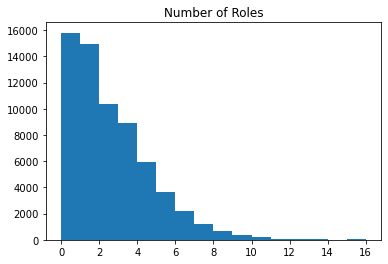

In [12]:
freq_roles = encoded_dfs[ROLE_COLS].sum(axis=1)
plt.hist(freq_roles , freq_roles.max())
plt.title('Number of Roles')
plt.show()

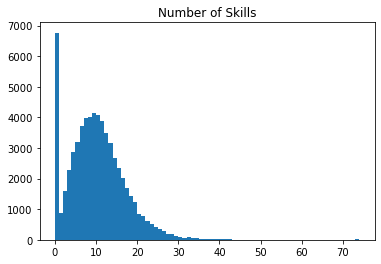

In [13]:
freq_tech = encoded_dfs[TECH_COLS].sum(axis=1)
plt.hist(freq_tech, freq_tech.max())
plt.title('Number of Skills')
plt.show()

In [14]:
# Filter frequencies 
ROLES_RANGE = [1,3]
TECH_RANGE  = [3,12]

In [15]:
# create masks
role_mask = (freq_roles >= ROLES_RANGE[0]) & (freq_roles <= ROLES_RANGE[1])
tech_mask = (freq_tech >= TECH_RANGE[0]) & (freq_tech <= TECH_RANGE[1])
filter_mask = role_mask & tech_mask

In [16]:
role_mask

0         True
1         True
2        False
3        False
4        False
         ...  
64456    False
64457    False
64458    False
64459    False
64460    False
Length: 64461, dtype: bool

In [17]:
tech_mask

0         True
1         True
2         True
3        False
4         True
         ...  
64456    False
64457    False
64458    False
64459    False
64460    False
Length: 64461, dtype: bool

In [18]:
filter_mask

0         True
1         True
2        False
3        False
4        False
         ...  
64456    False
64457    False
64458    False
64459    False
64460    False
Length: 64461, dtype: bool

In [19]:
features_df = features_df.loc[filter_mask].copy()
encoded_dfs = encoded_dfs.loc[filter_mask].copy()

In [20]:
# Check the total samples of roles
cleaned_role_sum = encoded_dfs["DevType"].sum(axis=0)
cleaned_role_sum

Academic researcher                              1039
Data or business analyst                         1059
Data scientist or machine learning specialist    1275
Database administrator                            745
DevOps specialist                                1212
Developer, QA or test                             791
Developer, back-end                              9144
Developer, desktop or enterprise applications    2985
Developer, embedded applications or devices      1193
Developer, front-end                             5177
Developer, full-stack                            8718
Developer, game or graphics                       608
Developer, mobile                                2573
Engineer, data                                    916
Scientist                                         590
System administrator                              880
dtype: int64

------------------------------------------------------------------------------------------------------------------------------------------

Merge & Export data

In [21]:
pd.MultiIndex.from_product([['skills_clusters'], features_df.columns])

MultiIndex([('skills_clusters',  'skill_group_0'),
            ('skills_clusters',  'skill_group_1'),
            ('skills_clusters', 'skill_group_10'),
            ('skills_clusters', 'skill_group_11'),
            ('skills_clusters', 'skill_group_12'),
            ('skills_clusters', 'skill_group_13'),
            ('skills_clusters', 'skill_group_14'),
            ('skills_clusters', 'skill_group_15'),
            ('skills_clusters', 'skill_group_16'),
            ('skills_clusters',  'skill_group_2'),
            ('skills_clusters',  'skill_group_3'),
            ('skills_clusters',  'skill_group_4'),
            ('skills_clusters',  'skill_group_5'),
            ('skills_clusters',  'skill_group_6'),
            ('skills_clusters',  'skill_group_7'),
            ('skills_clusters',  'skill_group_8'),
            ('skills_clusters',  'skill_group_9')],
           )

In [22]:
# Add second level indexing 
features_df.columns = pd.MultiIndex.from_product([['skills_clusters'], 
                                                  features_df.columns])

In [23]:
# Concatenate
df = pd.concat([encoded_dfs, features_df], axis=1)

In [24]:
# Export 
df.to_pickle(EXPORT_PATH)